<a href="https://colab.research.google.com/github/gitmanujacob/GUVI-TASK/blob/main/task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [148]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

df1=pd.read_csv("/content/college_1.csv")
df2=pd.read_csv("/content/college_2.csv")

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [149]:
df=pd.concat([df1,df2])
df.head()

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN


In [150]:
df.isna().sum()

Name                       0
python                     0
mysql                      0
Previous Geekions          0
CodeKata Score             0
Department                 0
Rising                     0
python_en                 84
computational_thinking    84
dtype: int64

In [151]:
df.fillna(0,inplace=True)

###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [152]:

top=df[df['CodeKata Score'] >= 15000]
top.to_csv("Exceeded expectations.csv")

In [153]:
df[(df['CodeKata Score'] >= 10000) & (df['CodeKata Score'] < 15000 )].to_csv("Reached_expectations.csv")

In [154]:
df[(df['CodeKata Score'] >= 70000) & (df['CodeKata Score'] < 10000 )].to_csv("Needs_Improvement.csv")

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [155]:
df[df['CodeKata Score']<7000].to_csv("Unsatisfactory.csv")

###### No of students participated 

In [156]:

print("No of students participated :{}".format(df.Name.count()))

No of students participated :119


###### #Average completion of python course or my_sql or python english or computational thinking

In [157]:


print("Average completion of my_sql: {}".format(df.mysql.mean()))

Average completion of my_sql: 23.5


###### rising star of the week (top 3 candidate who performed well in that particular week)

In [158]:
topstar=df.sort_values(by="Rising",ascending=False).head(3)
topstar


,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
8,shifak N,58.0,0.0,5180,8320,Electronics and Electrical Engineering,3140,0.0,0.0
18,Narasimhan Y L,-1.0,0.0,4800,6800,Computer Science and Engineering,2000,-1.0,0.0
2,Ganesh Ramkumar R,-1.0,24.0,8790,10790,Computer Science and Engineering,2000,55.0,6.0


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [223]:
topgeek=df.sort_values(by="Previous Geekions",ascending=False).head(3)
topgeek

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,0.0,0.0
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,0.0,0.0
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,0.0,0.0


###### Department wise codekata performence (pie chart)

In [160]:
dep=df.groupby("Department")["CodeKata Score"].mean()
dep


Department
Computer Science and Engineering             5079.761905
Electronics and Communication Engineering    2777.820513
Electronics and Electrical Engineering       3164.705882
Name: CodeKata Score, dtype: float64

([<matplotlib.patches.Wedge at 0x7f2f05632b50>,
 [Text(0.13490819619649513, 1.0916958269586856, 'Computer Science and Engineering'),
  Text(-0.9401648049597914, -0.5710430277263856, 'Electronics and Communication Engineering'),
  Text(0.6820374803157301, -0.8630323721880717, 'Electronics and Electrical Engineering')])

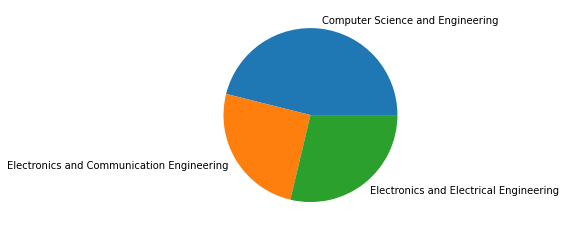

In [199]:
lab=df.Department.unique()
plt.title='Department wise codekata performence'
plt.pie(dep,labels=lab)

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [210]:
a=df[df.Department=="Computer Science and Engineering"].sort_values(by="CodeKata Score",ascending=False).head(1)
b=df[df.Department=="Electronics and Communication Engineering"].sort_values(by="CodeKata Score",ascending=False).head(1)
c=df[df.Department=="Electronics and Electrical Engineering"].sort_values(by="CodeKata Score",ascending=False).head(1)
toper=pd.concat([a,b,c])

In [217]:
toper


,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,0.0,0.0
3,Bodipudi Harini,-1.0,35.0,10040,10040,Electronics and Communication Engineering,0,0.0,-1.0
0,ASHOK KUMAR K,100.0,31.0,19400,19400,Electronics and Electrical Engineering,0,0.0,9.0


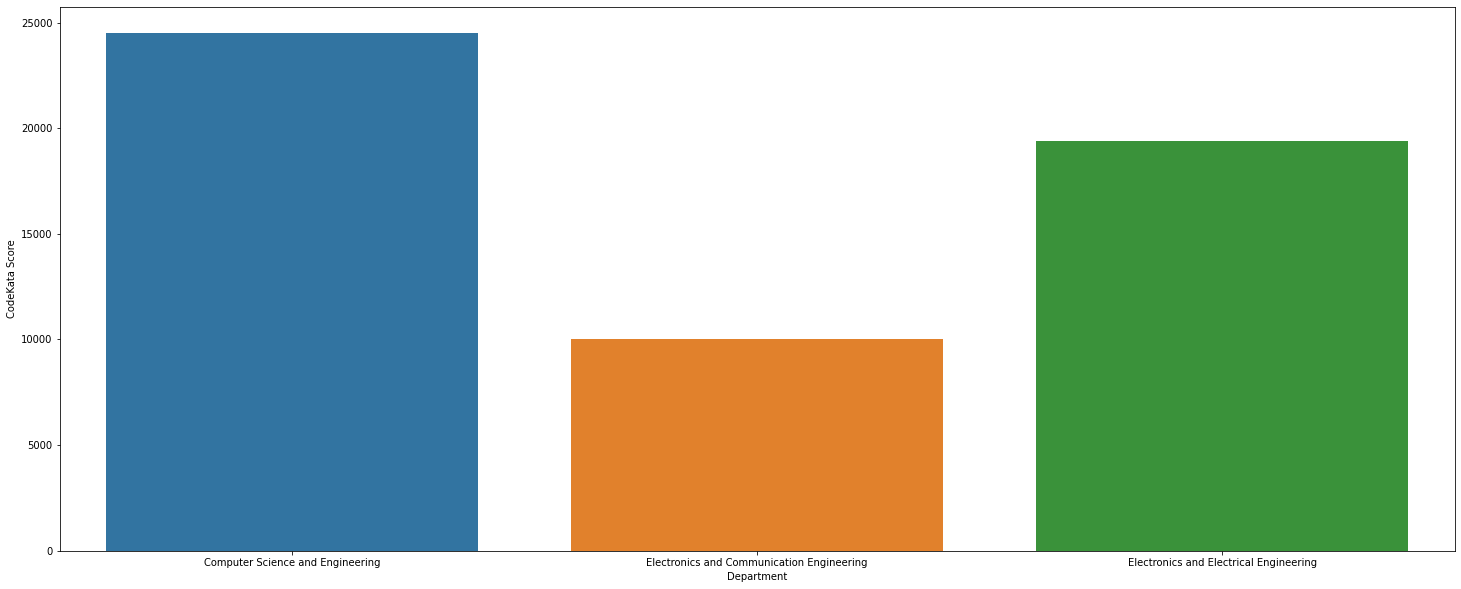

In [222]:
plt.figure(figsize=(25,10))
plt.xlabel("Department")
plt.ylabel("CodeKata Score")
sn.barplot(data=toper,x="Department",y="CodeKata Score")